# Курсова робота 

## Частина 1 (До 60 балів) Знайомство з можливостями Anaconda/IPython  Notebook 
_За частину 1 можна отримати **60 балів**._
***
### Мета Частини 1: 
- [ ] Вивчення основних принципів роботи та використання програмних  компонентів Anaconda. 
- [ ] Інсталяція. 
- [ ] Дослідження можливостей IPython  Notebook. 
- [ ] Підготовка розділу 1 пояснювальної записки про зроблену роботу — опис інсталяції, можливостей використання та їх ілюстрація. 
***
*<blockquote>Довідкова інформація 
Робота з Ipython Notebook  
Ipython Notebook — це середовище розробки, що дає можливості для інтерактивної та ітеративної  розробки проектів, пов’язаних з Data Science. Notebook інтегрує код та результати його виконання в  один файл разом з графіками, текстом, математичними виразами та іншими можливими видами  представлення інформації. IPython Notebook встановлюється разом з Spyder для Python 3 у  дистрибутиві [Anaconda](https://www.anaconda.com/). Гайд для початківців IPython можна знайти на [Медіумі](https://medium.com/velotio-perspectives/the-ultimate-beginners-guide-to-jupyter-notebooks-6b00846ed2af).</blockquote>*
***

## Частина 2. Виконання та підготовка розділу 2 пояснювальної записки. 
_За частину 2 додатково можна отримати **20-30 балів**   
**20 балів** — завдання 1-5  
+**10 балів** — +завдання 6-10_ 
***
### Мета Частини 2:
- [x] Отримати досвід використання основних засобів аналізу та візуалізації даних у середовищі IPython  Notebook на модельних наборах даних. 
- [x] Довідкова інформація
- [x] Візуалізація в Python — це важливий аспект роботи з даними. Python надає великі можливості для  візуального представлення даних, починаючи з відображення таблиць з виділенням окремих  елементів за допомогою pandas, закінчуючи побудовою графіків за допомогою matplotlib, seaborn,  mplot3d. Гайд для побудови візуалізації даних доступний через towards [data science](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e).
***  
### Дані  
Для виконання даної роботи можливих 2 варіанти даних:
1. В роботі використовується публічний набір даних з [kaggle](https://www.kaggle.com/datasets) 
1. В роботі використовується набір геопросторових даних. Серед можливих варіантів: [EuroSAT : Land Use and Land Cover Classification with Sentinel-2](https://github.com/phelber/EuroSAT), [So2Sat LCZ42](https://arxiv.org/abs/1912.12171) [(mediatum)](https://mediatum.ub.tum.de/1483140)  
1. Ідеальні набори даних (типу ірисів Фішера і т.п.)  
***

### Завдання

#### 1. Встановити IPython Notebook разом з Anaconda та створити новий IPython Notebook 3/2  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib
%matplotlib inline

from numba import njit

#### 3. Відкрити набір даних засобами pandas. 

In [2]:
df = pd.read_csv('vgsales.csv', index_col="Rank")
df.head()

df_for_corellation = df.copy()

#### 2. Проаналізувати набір даних на наявність пропущених значень та NaN. 
У випадку наявності таких значень їх потрібно заповнити значеннями за допомогою fillna,  використовуючи метод bfill (заміна на наступне валідне значення після Nan) або ffil (заміна  на попереднє валідне значення після Nan) 

In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
if df.isnull().values.any():
    df = df.bfill()# .fillna(method='bfill')

#### Data Changing 

In [6]:
df = df.astype({'Year': int,
         'NA_Sales': float,
         'EU_Sales': float,
         'JP_Sales': float,
         'Other_Sales': float,
         'Global_Sales': float})

In [7]:
df_for_corellation = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  int32  
 3   Genre         16598 non-null  object 
 4   Publisher     16598 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


#### 4. Представити його у матричному вигляді. 
##### Відобразити 10 елементів для 4-ох ознак. 
Виділити  зеленим кольором максимальні елементи в таблиці, а червоним мінімальні для цих 10-ти елементів.

In [9]:
df_10 = df.head(10)

In [10]:
s = df_10.style.hide(['Name', "Platform", 'Year', 'Genre', 'Publisher', 'Global_Sales'], axis="columns")#.hide(axis="rows")
s.set_table_styles([
    {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]},
    {'selector': '.index_name', 'props': 'font-style: italic; color: white; font-weight:normal;'},
    {'selector': 'th:not(.col_heading)', 'props': 'background-color: #00000; color: #000066;'}, 
    {'selector': 'th:not(.col_heading)', 'props': 'background-color: #000066;'}, 
    {'selector': 'th.col_heading', 'props': 'background-color: #000066; color: white;'}, 
    {'selector': 'th.row_heading', 'props': 'background-color: #000066; color: white;'}, 
]) #:not(.index_name)
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
    {'selector': '.true', 'props': 'background-color: #e6ffe6;'},
    {'selector': '.false', 'props': 'background-color: #ffe6e6;'},
], overwrite=False)
s.highlight_max(color='green').highlight_min(color='red')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,41.490000,29.020000,3.770000,8.460000
2,29.080000,3.580000,6.810000,0.770000
3,15.850000,12.880000,3.790000,3.310000
4,15.750000,11.010000,3.280000,2.960000
5,11.270000,8.890000,10.220000,1.000000
6,23.200000,2.260000,4.220000,0.580000
7,11.380000,9.230000,6.500000,2.900000
8,14.030000,9.200000,2.930000,2.850000
9,14.590000,7.060000,4.700000,2.260000


In [11]:
dispersion = df.var(numeric_only=True)
dispersion

Year            34.123282
NA_Sales         0.666971
EU_Sales         0.255380
JP_Sales         0.095661
Other_Sales      0.035566
Global_Sales     2.418112
dtype: float64

##### Вирахувати математичне сподівання та дисперсію для набору даних. Стандартизувати дані.  

![](Photos/4_2.jpg)

$ X_{std} = \dfrac{X - \mu}{\sigma} $

$ \mu = \sum{p_i X_i}$

$ \sigma = \sqrt{\dfrac{\sum(X_i - \bar{X})}{n-1}}$

In [12]:
# @njit(nogil=True)
def std(df):
    x = df.shape[1]
    # dict_for_res ={i:None for i in range(x)}
    # print(dict_for_res)
    array = df.values
    # print(array[:, 3])
    # print(array)
    
    rows, cols = array.shape
    for i in range(x):
        # print(i)
        # print(array[:, i].shape)
        array_1d = array[:, i]
        myu = mu(array_1d)
        sgma = sigma(array_1d)
        # print(array_1d, myu, sgma)
        if i == 0:
            array_to_return = (array_1d-myu)/sgma
        else:
            array_to_return = np.column_stack((array_to_return, (array_1d-myu)/sgma))
        # print(array_to_return)
    # print(dict_for_res)
    # print(list(dict_for_res.values()))
    # array = []
    # for item in list(dict_for_res.values()):
    #     print(item)
    # print(array_to_return)
    return array_to_return

# @njit(nogil=True)
def mean_1d(array_1d):
    sum_elem = 0
    for array_elem in array_1d:
        sum_elem += array_elem
    return sum_elem/array_1d.shape[0]

# @njit(nogil=True)
def mu(array_1d):
    array_mean = mean_1d(array_1d)
    sum_elem = 0
    for array_elem in array_1d:
        sum_elem += array_elem**2-array_mean**2
    # print(sum_elem, array_1d.shape[0]-1, sum_elem/(array_1d.shape[0]-1), np.sqrt(sum_elem/(array_1d.shape[0]-1)))
    return (sum_elem/(array_1d.shape[0]-1))

# @njit(nogil=True)
def sigma(array_1d):
    sum_elem = 0
    dict_for_elem_with_count = {}
    for array_elem in array_1d:
        if array_elem not in dict_for_elem_with_count:
            dict_for_elem_with_count[array_elem] = 1
        else:
            dict_for_elem_with_count[array_elem] += 1
    for array_elem, count in dict_for_elem_with_count.items():
        sum_elem += count * array_elem
    sgma = sum_elem
    return sgma

def mean(df):
    x = df.shape[1]
    # dict_for_res ={i:None for i in range(x)}
    # print(dict_for_res)
    array = df.values
    # print(array[:, 3])
    # print(array)
    
    rows, cols = array.shape
    for i in range(x):
        # print(i)
        # print(array[:, i].shape)
        array_1d = array[:, i]
        array_mean = mean_1d(array_1d)
        # myu = mu(array_1d)
        # sgma = sigma(array_1d)
        # print(array_1d, myu, sgma)
        if i == 0:
            array_to_return = array_mean
        else:
            array_to_return = np.column_stack((array_to_return, array_mean))
        # print(array_to_return)
    # print(dict_for_res)
    # print(list(dict_for_res.values()))
    # array = []
    # for item in list(dict_for_res.values()):
    #     print(item)
    # print(array_to_return)
    return array_to_return

# print(df_num)
# print(std(df_num))
# std_df = pd.DataFrame.from_dict(std(df_num))#.drop(columns=4)
# print(std_df.mean())
# print(std_df.var())
# print(std_df.std())
# std_df

In [13]:
df_num = df.select_dtypes(include=np.number)
df_num = df_num.drop('Year', axis=1)
df_num = df_num.drop('Global_Sales', axis=1)
df_num.values

array([[4.149e+01, 2.902e+01, 3.770e+00, 8.460e+00],
       [2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00]])

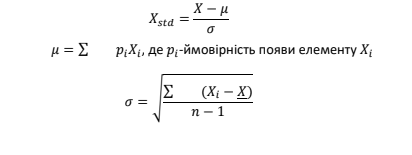

In [14]:
#normalized_df = (df_num-df_num.min())/(df_num.max()-df_num.min())
#normalized_df

# print(df_num)
# print(std(df_num))
# std_df = pd.DataFrame.from_dict(std(df_num))#, orient='index', columns=['EU_Sales','JP_Sales','NA_Sales','Other_Sales'])#.drop(columns=4)
# mean_df = pd.DataFrame.from_dict(mean(df_num))#, orient='index', columns=['EU_Sales','JP_Sales','NA_Sales','Other_Sales'])
# print(std_df.mean())
# print(std_df.var())
# print(std_df.std())
# std_df pd.DataFrame.from_dict(df_num.values - mean(df_num)) / std(df_num)#

standatrized_df = (df_num - df_num.mean()) / df_num.std()

# for i in range(standatrized_df.shape[1]):
#         # print(i)
#         # print(array[:, i].shape)
#         array_1d = standatrized_df[:, i]
#         # print(array_1d, myu, sgma)
#         if i == 0:
#             array_to_return = array_1d
#         else:
#             array_to_return = np.column_stack((array_to_return, array_1d))

print(standatrized_df.mean().apply(lambda x: "{:.6f}".format(x)))
print(standatrized_df.std())
print(standatrized_df.var())

standatrized_df

NA_Sales       -0.000000
EU_Sales        0.000000
JP_Sales       -0.000000
Other_Sales    -0.000000
dtype: object
NA_Sales       1.0
EU_Sales       1.0
JP_Sales       1.0
Other_Sales    1.0
dtype: float64
NA_Sales       1.0
EU_Sales       1.0
JP_Sales       1.0
Other_Sales    1.0
dtype: float64


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,
1,50.478988,57.135209,11.937698,44.604742
2,35.283374,6.793984,21.766640,3.828109
3,19.083698,25.197026,12.002362,17.296594
4,18.961252,21.496629,10.353428,15.440700
5,13.475647,17.301527,32.791869,5.047696
...,...,...,...,...
16596,-0.311831,-0.290198,-0.251484,-0.254857
16597,-0.311831,-0.290198,-0.251484,-0.254857
16598,-0.324076,-0.290198,-0.251484,-0.254857


#### 5. Провести візуалізацію даних. 
Для цього необхідно побудувати такі типи графіків: Line Plot,  Bare Chart, Histogram, Heatmap. 

In [15]:
standatrized_df_100 = standatrized_df.head(100)
standatrized_df_50 = standatrized_df.head(50)

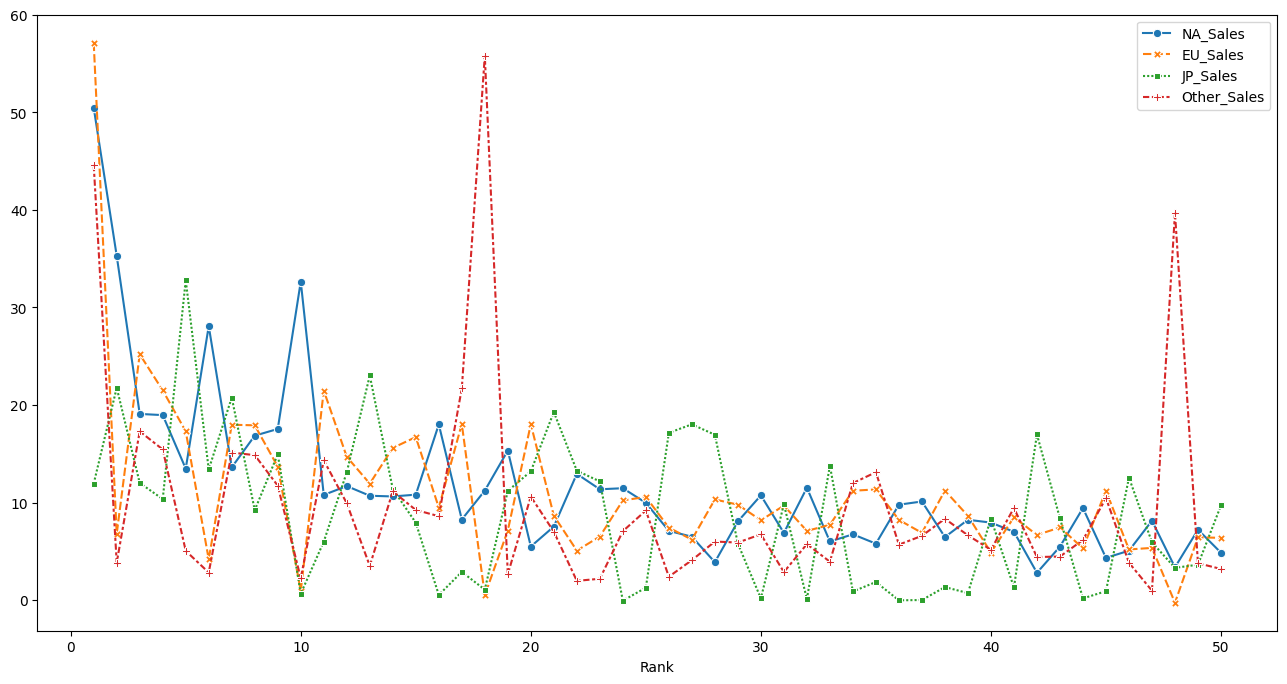

In [16]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=standatrized_df_50, markers=True)

<Axes: >

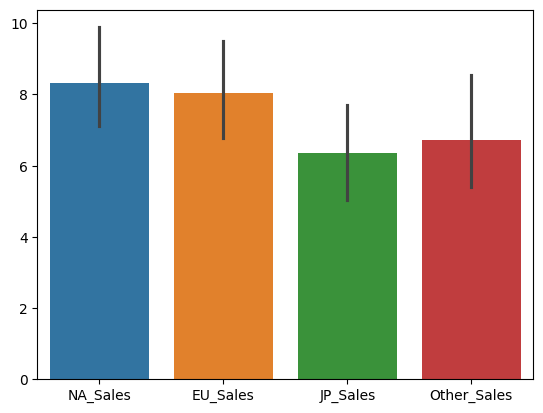

In [17]:
sns.barplot(standatrized_df_100)

<Axes: ylabel='Count'>

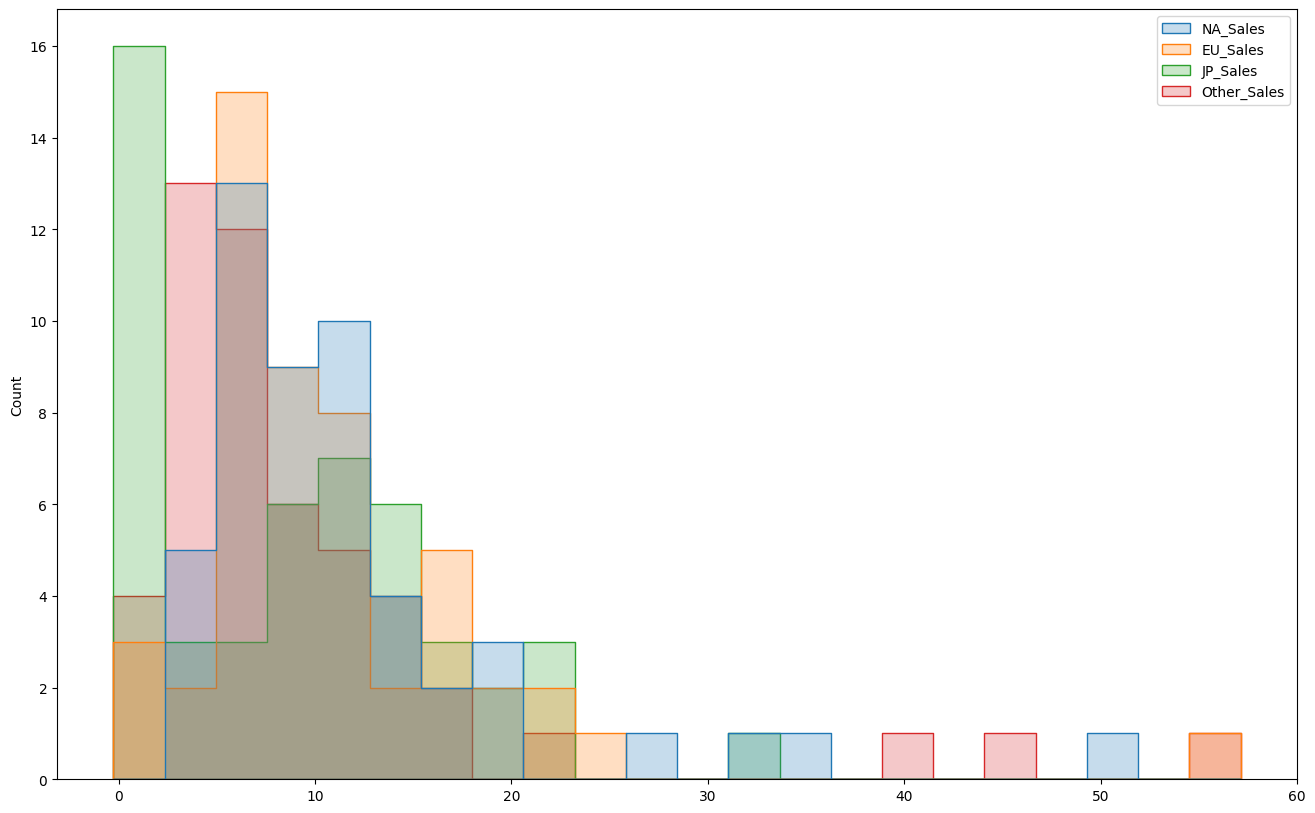

In [18]:
plt.figure(figsize=(16, 10))
sns.histplot(standatrized_df_50, multiple='layer', element='step') #{“layer”, “dodge”, “stack”, “fill”} {“bars”, “step”, “poly”}

<Axes: ylabel='Rank'>

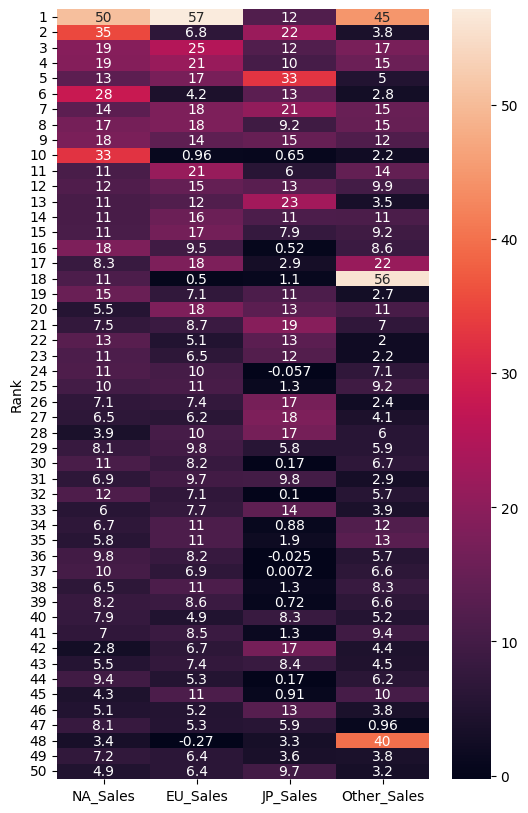

In [19]:
plt.figure(figsize=(6, 10))
ax = sns.heatmap(standatrized_df_50, annot=True)
ax#.invert_yaxis()

#### 6. Збудувати лінійний графік з 4-ма лініями, які взяті з ознак та додати annotate для середнього  значення кожної лінії. 
При цьому для візуалізації багатовимірних даних з кількістю ознак  більше двох обов’язково необхідно за допомогою subplot збудувати 9 графіків за  допомогою комбінування різних ознак. [Туторіал по subplot та приклади](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8)  



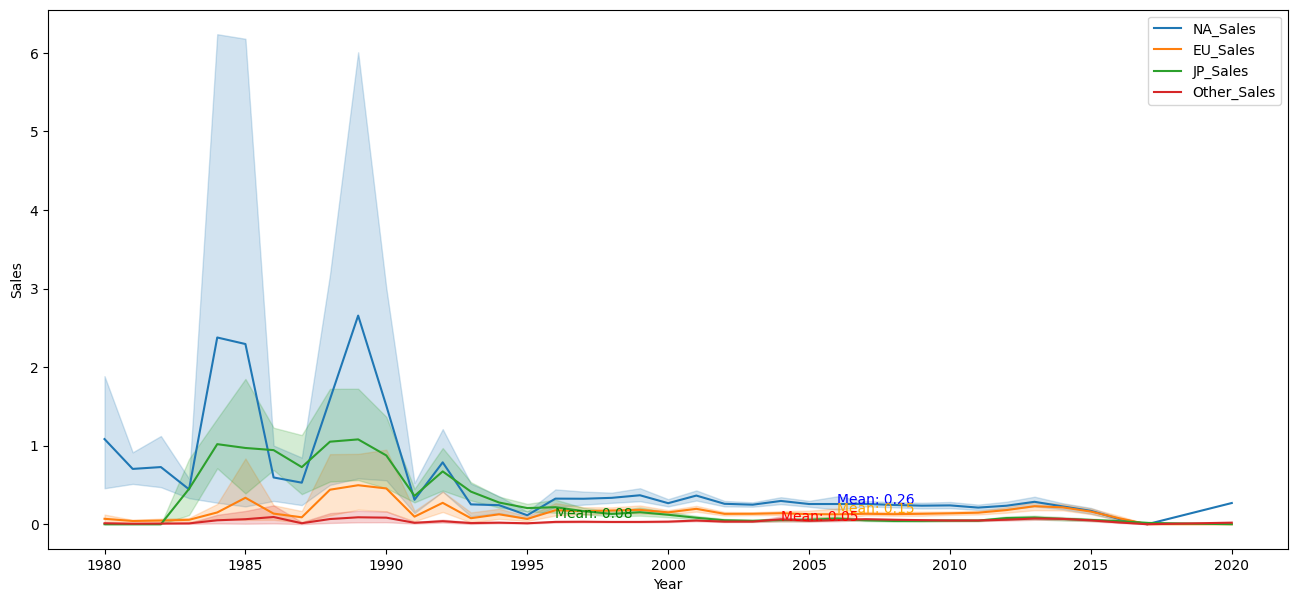

In [21]:
plt.figure(figsize=(16, 7))
# Створюємо графік з чотирма лініями

x = df['Year']#.values
y1 = df['NA_Sales']#.values
y2 = df['EU_Sales']#.values
y3 = df['JP_Sales']#.values
y4 = df['Other_Sales']#.values
colors = ['blue', 'orange', 'green', 'red']

sns.lineplot(x=x, y=y1, label='NA_Sales')
sns.lineplot(x=x, y=y2, label='EU_Sales')
sns.lineplot(x=x, y=y3, label='JP_Sales')
sns.lineplot(x=x, y=y4, label='Other_Sales')

# Додаємо анотації для середнього значення кожної лінії
for i, line in enumerate([y1, y2, y3, y4]):
    mean_value = np.mean(line)
    max_sales = df[line.name].max()
    # print(max_sales)
    # print(df[df[line.name] == max_sales]['Year'].values, mean_value)
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(df[df[line.name] == max_sales]['Year'].values, mean_value),color=colors[i])#, textcoords='offset points', xytext=(5, 0), ha='left')

# Додаємо легенду та підписи до осей
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sales')

# Відображаємо графік
plt.show()

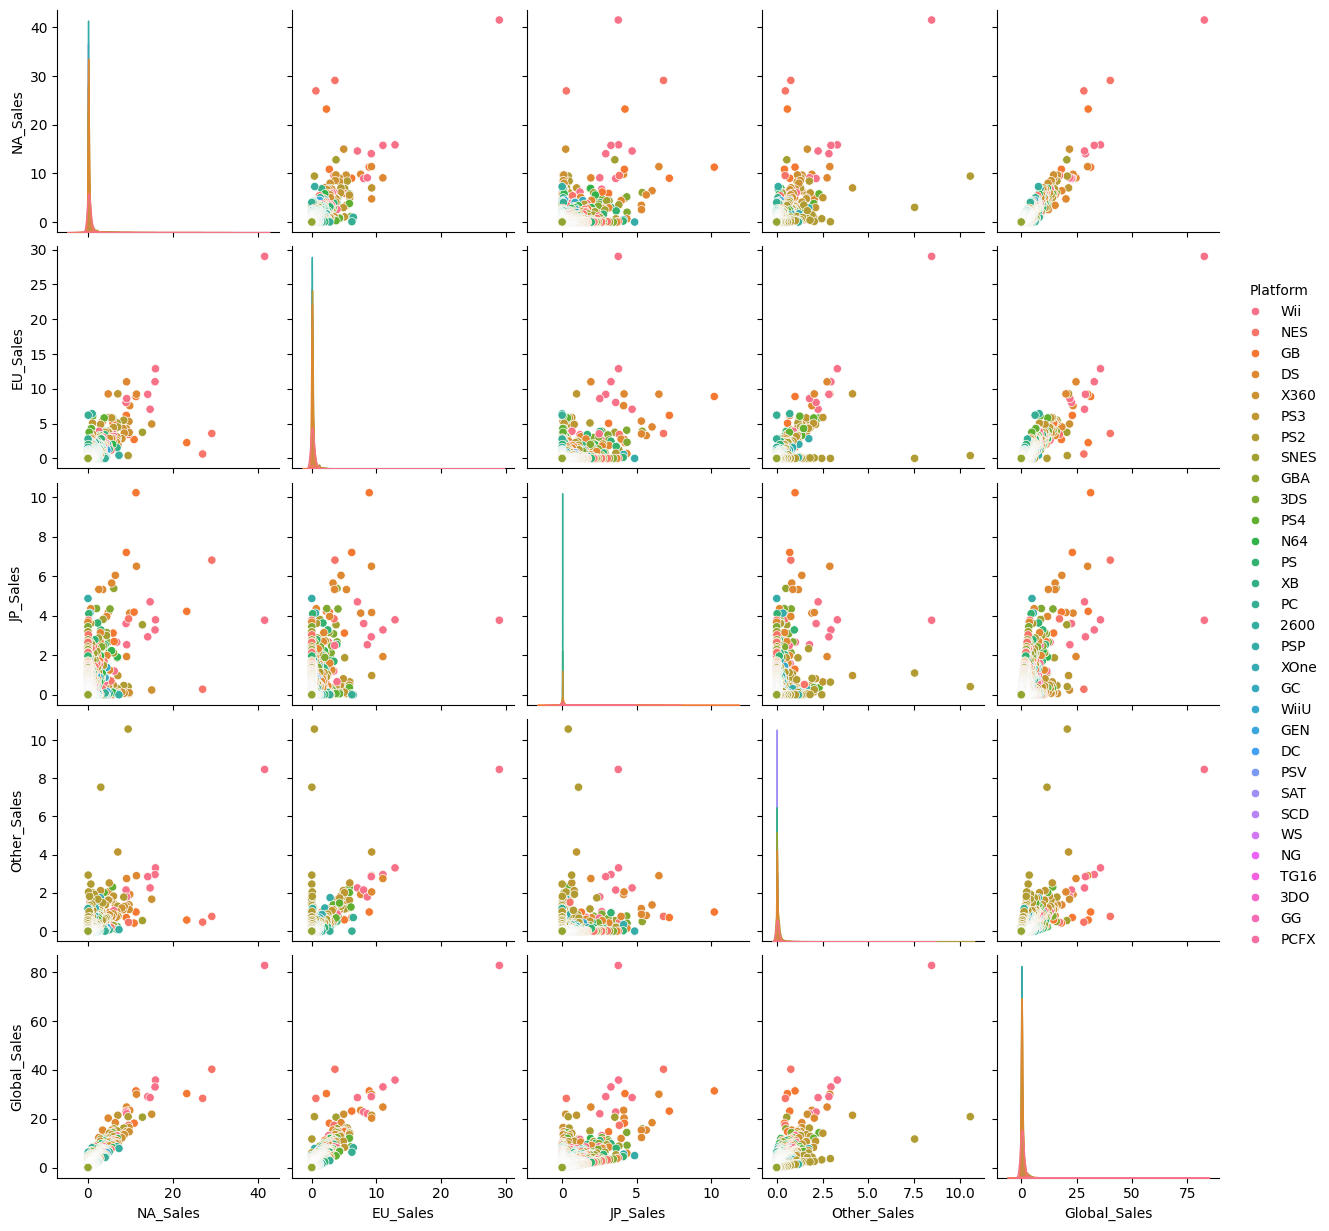

In [20]:
sns.pairplot(df.drop(['Year'],axis=1), hue='Platform')

#### 7. Вирахувати коефіцієнт пірсона для кожної пари ознак. 
Взяти третю ознаку за вісь X та збудувати relplot для двох ознак, що мають найбільшу  кореляцію за допомогою бібліотеки seaborn. 

In [22]:
df_for_corellation.corr(method="pearson", numeric_only=True)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.090542,0.006383,-0.167479,0.040792,-0.073852
NA_Sales,-0.090542,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.006383,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.167479,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.040792,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.073852,0.941047,0.902836,0.611816,0.748331,1.000000


Бачимо, що Global_Sales та NA_Sales мають найбільшу кореляцію. Тож беремо перші 30 з рейтингу та кладемо в sns.relplot(), підсвічуючи яка саме це платформа.

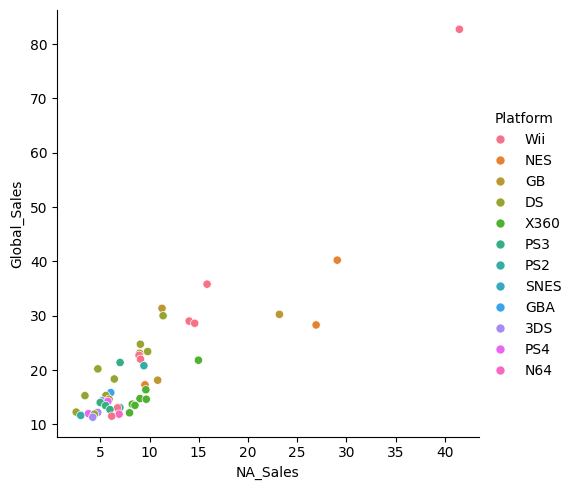

In [26]:
sns.relplot(df_for_corellation.head(50), x='NA_Sales', y='Global_Sales', hue='Platform')

#### 8. У початковому наборі даних, перед заміною значень Nan на валідні значення за допомогою  fillna, необхідно видалити всі колонки із значеннями Nan. 

Згадуємо, що на початку зробили копію основного датасету, викидуємо значення Nan, надаємо правильні типи данних та перевіряємо чи видалили усі Nan.

In [24]:
df_for_corellation = df_for_corellation.dropna()
df_for_corellation = df_for_corellation.astype({'Year': int,
     'NA_Sales': float,
     'EU_Sales': float,
     'JP_Sales': float,
     'Other_Sales': float,
     'Global_Sales': float})
df_for_corellation.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### 9. Видалити також випадкові значення з ознак що мають найбільшу кореляцію у кількості 10%  для обох. 
Підрахувати кореляцію. Збудувати multipple scatterplot за допомогою FacetGrid  для цих оновлених ознак використовуючи бібліотеку seaborn взявши третю ознаку за вісь x.

Кореляція після видалення випадкових значень:
                  Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year          1.000000 -0.090542  0.006383 -0.167479     0.040792   
NA_Sales     -0.090542  1.000000  0.767727  0.449787     0.634737   
EU_Sales      0.006383  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.167479  0.449787  0.435584  1.000000     0.290186   
Other_Sales   0.040792  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.077566  0.940562  0.904240  0.630902     0.779289   

              Global_Sales  
Year             -0.077566  
NA_Sales          0.940562  
EU_Sales          0.904240  
JP_Sales          0.630902  
Other_Sales       0.779289  
Global_Sales      1.000000  


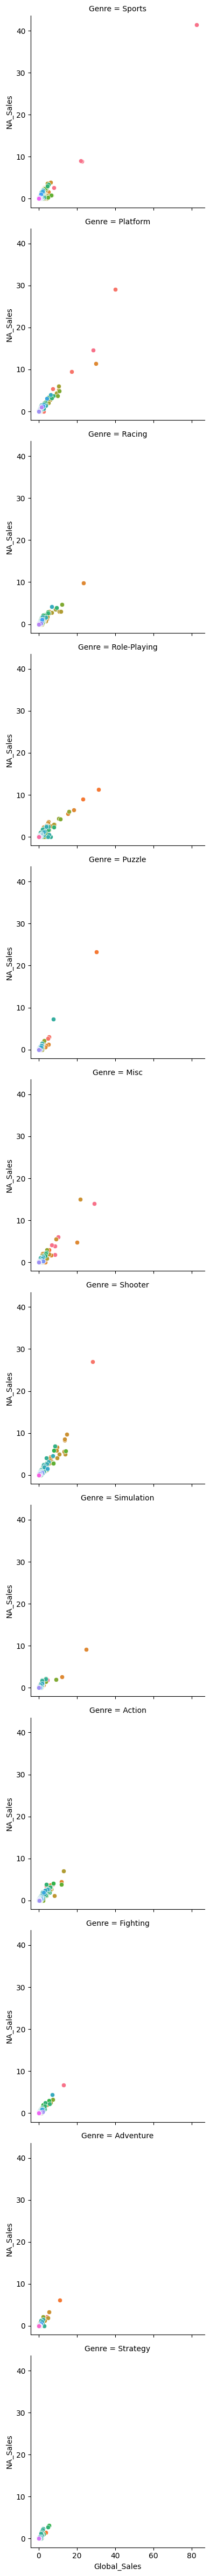

In [30]:
# plt.figure(figsize=(16, 8))
# Обчислюємо кореляції між ознаками
correlation_matrix = df_for_corellation.corr(method="pearson", numeric_only=True)

# Знаходимо пари ознак з найвищою кореляцією
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Видаляємо 10% випадкових значень для вибраних ознак
for feature in correlated_features:
    mask = np.random.rand(len(df_for_corellation)) < 0.9
    df_for_corellation.loc[~mask, feature] = np.nan

# Виводимо кореляцію після видалення випадкових значень
print("Кореляція після видалення випадкових значень:")
print(df_for_corellation.corr(method="pearson", numeric_only=True))

# Побудова multiple scatterplot за допомогою FacetGrid
g = sns.FacetGrid(df_for_corellation, row='Genre', hue='Platform', height=4)
g.map(sns.scatterplot, 'Global_Sales', 'NA_Sales')
plt.show()

***
## Частина 3. Виконання та протоколювання додаткових завдань.  Використання реального датасета (до 100 балів) 
### Довідкова інформація 
Коефіцієнт Пірсона для двох рядів даних X та Y вираховується за формулою:

![](Photos/1_0.jpg)

|Клас кореляції|Коефіцієнт Пірсона|
|:---|:-|
|Відсутня кореляція|[-0.09,0.09] |
|Низька кореляція|(-0.3,-0.1]∪[0.1,0.3)|
|Середня кореляція|(-0.5,-0.3]∪[0.3,0.5)|
|Висока кореляція|[-1,-0.5]∪[0.5,1]|

### Модулі Python: 
1. [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)  
2. [numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)  
3. [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)  

### Додаткові завдання 
1. Збудувати регресійні моделі прогнозування однієї ознаки на основі іншої. Для цього візьміть  дві ознаки, що мають найбільшу кореляцію. Необхідно протестувати такі регресійні моделі  (за вибором): 

    - [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
    - [Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  
    - [Multi Layer Perceptron Regression](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)



2. Вирахувати точність прогнозування та вибрати модель з найкращим результатом  

3. Метрики точності для регресій реалізованих в бібліотеці [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)  

4. Візуалізувати результуючу регресійну функцію та результат прогнозування за допомогою  matplotlib та seaborn.  [Візуалізація регресійних функцій](https://seaborn.pydata.org/tutorial/regression.html)  

5. Піднести до квадрату ознаку, що використовується в якості предиктора для регресійної  моделі та використати її квадрат ознаки як другу ознаку 

6. Протестувати набір регресійних моделей з двома предикторами. Побудувати точності та  графіки для обох ознак. Порівняти на графіках результати прогнозування з однією та двома  ознаками взявши за x початкову ознаку. Для цього використайте matplotlib та seaborn. 

7. Додатково. Приклади коду. Візуалізувати результат регресії з двома предикторами за  допомогою [mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) для кожної з регресійних моделей. [Туторіал по використанню mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) 
